<a href="https://colab.research.google.com/github/santhoshjinna15/INFO5731/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [47]:
!pip install pyLDAvis 
!pip install ipympl
%matplotlib ipympl
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
tokenizer = RegexpTokenizer(r'\w+')
p_stemmer = PorterStemmer()

     |████████████████████████████████| 112kB 5.5MB/s 


In [65]:
# Write your code here

import pandas as pd
data = pd.read_csv('/content/joker_reviews.csv')
data



,Title,Review,Sentiment
0,Outstanding movie with a haunting performance ...,"Every once in a while a movie comes, that trul...",positive
1,Only certain people can relate,This is a movie that only those who have felt ...,positive
2,Perfect in every aspect.,"Truly a masterpiece, The Best Hollywood film o...",positive
3,MASTERPIECE 😍,Joaquin Phoenix gives a tour de force performa...,positive
4,The Hype is real,Most of the time movies are anticipated like t...,positive
...,...,...,...
120,"Went into this blind, and i didnt enjoy it at ...",I didnt really know much about this movie. I h...,Negative
121,Great,NaN,NaN
122,Very Disappointing,Film was directed and produced poorly. Opportu...,Negative
123,"By far the best DC movie to date, Joaquin Phoe...","Wow, what a movie! I have to admit, When I fir...",positive


In [66]:
from nltk.corpus import stopwords
from textblob import TextBlob
data['Lower Case'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
data['Tokenization'] = data['Lower Case'].apply(lambda x: tokenizer.tokenize(x))
data['Stemming'] = data['Tokenization'].apply(lambda x: [p_stemmer.stem(i) for i in x])

In [67]:
texts = []
for line in data['Stemming']:
  texts.append(line)

Bigrams and Trigrams

In [68]:
from gensim import corpora, models
bigram = models.Phrases(texts, min_count=5, threshold=100)
trigram = models.Phrases(bigram[texts], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[texts[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['everi', 'onc', 'in', 'a', 'while', 'a', 'movi', 'come', 'that', 'truli', 'make', 'an', 'impact', 'joaquin', 's', 'perform', 'and', 'scenographi', 'in', 'all', 'it', 's', 'brillianc', 'grotesqu', 'haunt', 'and', 'cringi', 'hard', 'to', 'watch', 'at', 'time', 'but', 'so', 'mesmer', 'you', 'won', 't', 'blink', 'an', 'eye', 'watch', 'it', 'tragic', 'but', 'with', 'serious', 'funni', 'moment', 'emot', 'rollercoast', 'sometim', 'with', 'multipl', 'emot', 'pop', 'up', 'at', 'the', 'same', 'time', 'thi', 'is', 'far', 'from', 'a', 'typic', 'action', 'riddl', 'predict', 'super', 'hero', 'movi', 'it', 's', 'a', 'proper', 'psycholog', 'thriller', 'drama', 'with', 'the', 'singl', 'best', 'charact', 'develop', 'i', 'have', 'ever', 'seen']


In [69]:

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [70]:

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [71]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [72]:
import spacy
data_words_bigrams = make_bigrams(texts)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

[['onc', 'while', 'movi', 'come', 'truli', 'make', 'impact', 'joaquin', 'perform', 's', 'brillianc', 'grotesqu', 'hard', 'watch', 'time', 'so', 'mesmer', 'win', 't', 'blink', 'eye', 'watch', 'tragic', 'serious', 'moment', 'pop', 'same', 'time', 'thi', 'far', 'typic', 'action', 'riddl', 'predict', 'super', 'hero', 's', 'proper', 'psycholog', 'thriller', 'drama', 'singl', 'good', 'charact', 'develop', 'ever', 'see']]


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

Preparing Corpus and Dictionary

In [73]:

id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1)]]


In [74]:
id2word[0]

'action'

In [75]:

[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('action', 1),
  ('blink', 1),
  ('brillianc', 1),
  ('charact', 1),
  ('come', 1),
  ('develop', 1),
  ('drama', 1),
  ('ever', 1),
  ('eye', 1),
  ('far', 1),
  ('good', 1),
  ('grotesqu', 1),
  ('hard', 1),
  ('hero', 1),
  ('impact', 1),
  ('joaquin', 1),
  ('make', 1),
  ('mesmer', 1),
  ('moment', 1),
  ('movi', 1),
  ('onc', 1),
  ('perform', 1),
  ('pop', 1),
  ('predict', 1),
  ('proper', 1),
  ('psycholog', 1),
  ('riddl', 1),
  ('s', 2),
  ('same', 1),
  ('see', 1),
  ('serious', 1),
  ('singl', 1),
  ('so', 1),
  ('super', 1),
  ('t', 1),
  ('thi', 1),
  ('thriller', 1),
  ('time', 2),
  ('tragic', 1),
  ('truli', 1),
  ('typic', 1),
  ('watch', 2),
  ('while', 1),
  ('win', 1)]]

LDA

In [76]:

lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [77]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.051*"s" + 0.033*"movi" + 0.024*"thi" + 0.021*"see" + 0.020*"say" + '
  '0.017*"film" + 0.017*"good" + 0.015*"play" + 0.014*"feel" + 0.013*"realli"'),
 (1,
  '0.034*"could" + 0.027*"joker" + 0.024*"movi" + 0.021*"person" + '
  '0.020*"thing" + 0.020*"thi" + 0.018*"good" + 0.018*"happen" + '
  '0.017*"screen" + 0.017*"actual"'),
 (2,
  '0.079*"everyth" + 0.038*"give" + 0.035*"actual" + 0.031*"suppos" + '
  '0.031*"miss" + 0.026*"movi" + 0.019*"critic" + 0.018*"kill" + '
  '0.017*"period" + 0.017*"question"'),
 (3,
  '0.026*"can" + 0.022*"joker" + 0.022*"make" + 0.020*"thi" + 0.019*"take" + '
  '0.018*"thing" + 0.016*"call" + 0.016*"charact" + 0.015*"life" + '
  '0.015*"onli"'),
 (4,
  '0.060*"just" + 0.033*"joker" + 0.032*"thi" + 0.024*"film" + 0.020*"watch" + '
  '0.018*"time" + 0.017*"make" + 0.016*"good" + 0.016*"tell" + 0.016*"look"'),
 (5,
  '0.019*"imagin" + 0.019*"misfit" + 0.010*"old" + 0.010*"overpay" + '
  '0.010*"looong" + 0.010*"mother" + 0.010*"vader" + 0.010*"laym

In [78]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -7.266914661778522

Coherence Score:  0.36395127309558056


LSA

In [168]:
lsamodel = models.LsiModel(corpus, num_topics = 20, id2word = id2word)

In [169]:
pprint(lsamodel.print_topics(num_topics = 20))

[(0,
  '-0.505*"movi" + -0.314*"s" + -0.310*"thi" + -0.199*"joker" + -0.179*"good" '
  '+ -0.161*"so" + -0.147*"see" + -0.141*"make" + -0.137*"film" + '
  '-0.133*"just"'),
 (1,
  '-0.545*"movi" + 0.464*"s" + 0.273*"film" + -0.178*"thi" + -0.128*"so" + '
  '0.126*"say" + 0.123*"will" + 0.108*"would" + 0.100*"good" + 0.093*"feel"'),
 (2,
  '0.359*"movi" + -0.257*"thi" + -0.235*"joker" + 0.227*"s" + -0.171*"so" + '
  '-0.171*"go" + -0.169*"make" + -0.167*"will" + -0.130*"just" + 0.121*"good"'),
 (3,
  '0.337*"just" + -0.252*"joker" + 0.204*"s" + -0.174*"will" + -0.159*"thing" '
  '+ 0.158*"so" + -0.149*"life" + -0.125*"movi" + -0.122*"may" + '
  '0.122*"watch"'),
 (4,
  '-0.240*"so" + 0.227*"charact" + 0.222*"joker" + 0.211*"s" + 0.194*"even" + '
  '-0.171*"peopl" + 0.170*"just" + -0.140*"make" + -0.139*"good" + '
  '-0.138*"actual"'),
 (5,
  '0.285*"just" + 0.251*"joker" + -0.235*"peopl" + -0.212*"also" + '
  '0.189*"watch" + 0.175*"time" + -0.132*"thi" + 0.131*"could" + -0.130*"film" '

In [170]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 1):
  model = models.LsiModel(corpus, num_topics = 20, id2word = id2word)
  model_list.append(model)
  coherencemodel = CoherenceModel(model= model, texts = data['Stemming'], dictionary = id2word, coherence='c_v')
  coherence_values.append(coherencemodel.get_coherence())

/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


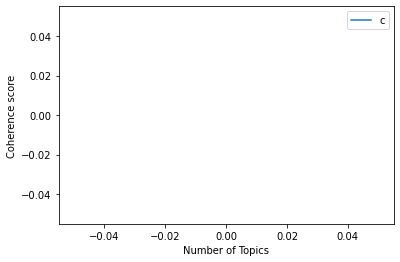

In [183]:

%matplotlib inline
import matplotlib.pyplot as plt
x = range(2, 12, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"),loc='best')
plt.show()

LDA

Reviews on joaquin

Reviews on action

Reviews on drama

Reviews on  performance

Reviews on cinematography

Reviews on Direction

Reviews on best acting

Reviews on corruption

Reviews on triumph

Reviews on pathetic

Lsa

Reviews on Joker

Joaquin Phoenix gives Heath Ledger

 100% Oscar worthy

movies related to mental illness called creative diarrhoea.

The movie was excellent and amazing,

 Its a boring movie until the last 5 minutes... overhyped as usual

 This has to be the dumbest DC movie yet

 It's just that boring.

 Joaquin Phoenix was going to be the joker

 One of the worst movies

 Ratings for acting are overrated.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [111]:
# Write your code here

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(data['Review'])
print(X_tfidf.shape)




(106, 2450)


In [112]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
mnb = MultinomialNB()
svm = LinearSVC()

In [114]:
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, data['Sentiment'], test_size=0.2, random_state=42)
model_mnb = mnb.fit(x_train,y_train)

In [115]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred_mnb = model_mnb.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_mnb,y_test))
print(classification_report(y_test,y_pred_mnb))

Accuracy 0.5454545454545454
              precision    recall  f1-score   support

    Negative       0.83      0.71      0.77         7
     Neutral       0.00      0.00      0.00         7
    Positive       0.00      0.00      0.00         1
    positive       0.44      1.00      0.61         7

    accuracy                           0.55        22
   macro avg       0.32      0.43      0.34        22
weighted avg       0.40      0.55      0.44        22



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=7)
print("using MNB",scores.mean())

using MNB 0.4523809523809524


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)


In [121]:

model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_svm,y_test))
print(classification_report(y_test,y_pred_svm))

Accuracy 0.6363636363636364
              precision    recall  f1-score   support

    Negative       0.64      1.00      0.78         7
     Neutral       1.00      0.29      0.44         7
    Positive       0.00      0.00      0.00         1
    positive       0.56      0.71      0.63         7

    accuracy                           0.64        22
   macro avg       0.55      0.50      0.46        22
weighted avg       0.70      0.64      0.59        22



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
scores = cross_val_score(svm, x_test, y_test, cv=7)
print("using svm",scores.mean())

using svm 0.5357142857142857


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)



I selected linear svm and multinomial naivee bayes algorithms.

I performed tf-idf as is it balances out the term frequency (how often the word appears in the document) with its inverse document frequency (how often the term appears across all documents in the data set).


This means that words like “a” and “the” will have very low scores as they’ll appear in all documents in your set. Rarer words like for example 'Natural language processing' will be very common in just a handful of documents which talk about text classification. TF-IDF will give higher scores to these words and thus they’ll be the ones that the model identifies as important and tries to learn.
Using MNB i got

accuracy: 54.5 
              precision    recall  f1-score   support

    Negative       0.83      0.71      0.77         7
     Neutral       0.00      0.00      0.00         7
    Positive       0.00      0.00      0.00         1
    positive       0.44      1.00      0.61         7

using SVM i got

accuracy: 63.6
              precision    recall  f1-score   support

    Negative       0.64      1.00      0.78         7
     Neutral       1.00      0.29      0.44         7
    Positive       0.00      0.00      0.00         1
    positive       0.56      0.71      0.63         7


As you can see svm algorithm is better for this dataset as it has more accuracy, precision, recall, f1 score.

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [132]:
# Write your code here
import pandas as pd
train = pd.read_csv(r'/content/train.csv')
test = pd.read_csv(r'/content/test.csv')

In [133]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [135]:
print(train.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [136]:
print(test.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

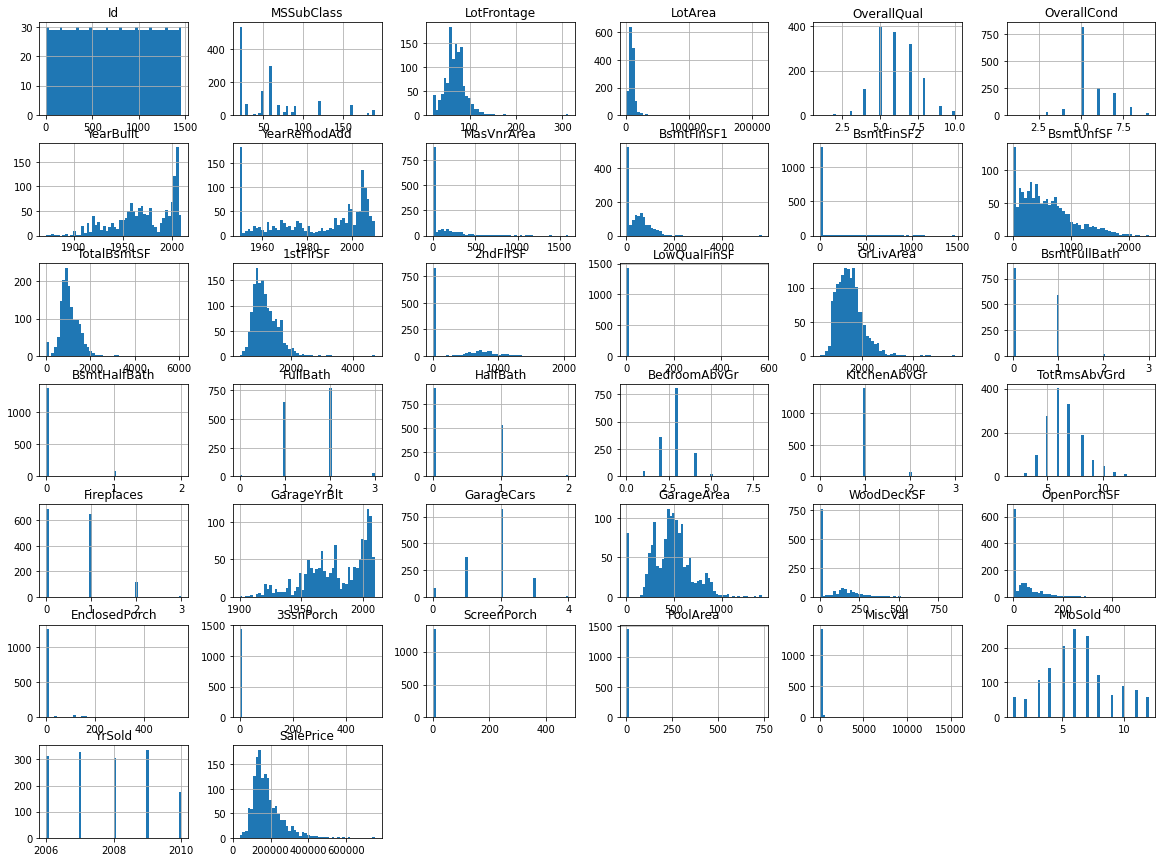

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [139]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

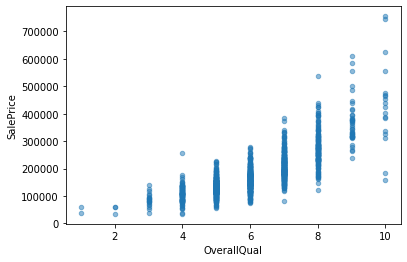

In [140]:
train.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)


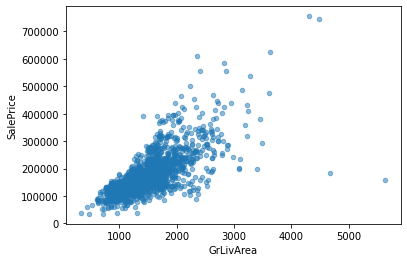

In [141]:
train.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)

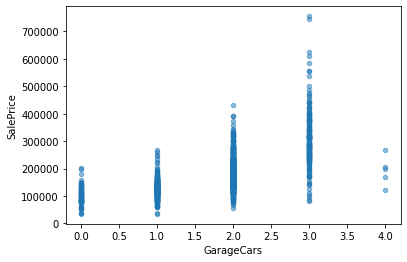

In [142]:
train.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)

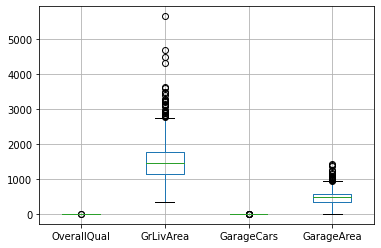

In [143]:
train.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

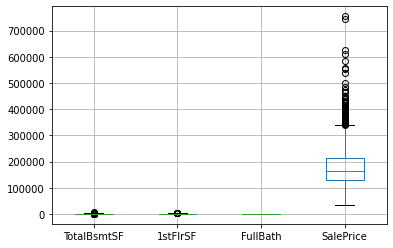

In [144]:
train.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

In [146]:
print(train.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [147]:
print(test.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Data Encoding

In [156]:
train = train.dropna()

In [157]:
from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for column in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train[column].values))
    train[column] = encoder.transform(list(train[column].values))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [158]:
test = test.dropna()

In [159]:
for column in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test[column].values))
    test[column] = encoder_test.transform(list(test[column].values))

In [160]:
x_values = train[train.columns[:80]]

In [161]:

x_test_values = test[test.columns[:80]]

In [162]:
y_values = train['SalePrice']

Training the Regression Model

In [163]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_values, y_values)
reg_model.score(x_values, y_values)

0.8567282752792799

Predicting the House Sale Price

In [164]:
predicted = reg_model.predict(x_test_values)

In [165]:
pd.DataFrame({'Predicted House Price Values': predicted})

,Predicted House Price Values
0,251296.260467
1,231417.544757
2,314129.078575
3,330239.658379
4,333571.977691
5,316027.181367
6,307824.468431
7,339506.495435
8,260081.289539
9,343409.374477
